In [1]:
import gensim
import pandas as pd
import random
import numpy as np
import matplotlib.pyplot as plt
import cPickle as pickle
from scipy.spatial.distance import cosine
from nltk.tokenize import PunktSentenceTokenizer
import matplotlib.pyplot as plt
import seaborn as sb
import time
%matplotlib inline

In [2]:
def seperatePunct(incomingString):
    outstr = ''
    characters = set(['!','@','#','$',"%","^","&","*",":","\\",
                  "(",")","+","=","?","\'","\"",";","/",
                  "{","}","[","]","<",">","~","`","|"])

    for char in incomingString:
        if char in characters:
            outstr = outstr + ' ' + char + ' '
        else:
            outstr = outstr + char

    return outstr

def hasNumbers(inputString):
     return any(char.isdigit() for char in inputString)

def text_cleaner(wordList):
    '''
    INPUT: List of words to be tokenized
    OUTPUT: List of tokenized words
    '''

    tokenziedList = []

    for word in wordList:

        #remove these substrings from the word
        word = word.replace('[deleted]','')
        word = word.replace('&gt','')

        #if link, replace with linktag
        if 'http://' in word:
            tokenziedList.append('LINK_TAG')
            continue

        #if reference to subreddit, replace with reddittag
        if '/r/' in word:
            tokenziedList.append('SUBREDDIT_TAG')
            continue

        #if reference to reddit user, replace with usertag
        if '/u/' in word:
            tokenziedList.append('USER_TAG')
            continue

        #if number, replace with numtag
        #m8 is a word, 5'10" and 54-59, 56:48 are numbers
        if hasNumbers(word) and not any(char.isalpha() for char in word):
            tokenziedList.append('NUM_TAG')
            continue

        #seperate puncuations and add to tokenizedList
        newwords = seperatePunct(word).split(" ")
        tokenziedList.extend(newwords)

    return tokenziedList

def mytokenizer(comment):
    '''
    Input: takes in a reddit comment as a str or unicode and tokenizes it
    Output: a tokenized list
    '''

    sentenceList = tokenizer.tokenize(comment)
    wordList = []
    for sentence in sentenceList:
        wordList.extend(sentence.split(" "))

    return text_cleaner(wordList)

In [3]:
modelpath = '../../models/basemodel2/basemodel2.doc2vec'
trainpath = '../../data/labeledRedditComments2.p'
cvpath = '../../data/twitter_cross_val.csv'

In [4]:
model = gensim.models.Doc2Vec.load(modelpath)

In [12]:
val = model.vocab

In [23]:
len(val)

308606

In [19]:
hi = val.iterkeys()

In [ ]:
for word in val.keys():
    print word
    print ""



considered,

considered.

Craziness

nunnery

EXPLAIN

gah

sowell

Panzergroup

Plasticine

woods

clotted

spiders

gaf

N00000528

woody

trawling

comically

Prong

250k-300k

Prone

frou-frou

Grassley.

wp43OdtAAkM

amplification,

pres12

amplification.

Sac.

facepalm.jpg

20subspecies.

cake,

Sergeant,

Journey

caned

mars.

Gray’s

totalbiscuit,

Englanders,

faggot,

Retreat

Euro

ruffled.

Fuck-ups

slothful

naturopathic

spider.

spider,

Secularism

replacer

no..its

pigment

Secularist

Millenia

Lajoie

Morten

everything.


screaming

rubs.

www.lifesitenews.com

rubs,

AlienBlue

Generalisation

wooded

jackasses.

grueling

wooden

iluminati

Sergeants

Sack

virtuosos

non-experienced

polos,

re-locating

immunities

non-miraculous

cane.

everything..

bbqs

Pinkerton

thrace

sheepish.

left.



TRAI

snuggles

anti-vaxx

😏

anti-marriage

270

affiliate,

quagmire.

affiliate.

277

Dixiecrat

Honorable

kid


pro-Democrat

archiving.

snuggled

dialogs



In [5]:
docvecs = model.docvecs

In [6]:
reddit = pickle.load(open(trainpath, 'rb'))

In [12]:
reddit.columns

Index([u'subreddit', u'id', u'name', u'body', u'label'], dtype='object')

In [7]:
tweets = pd.read_csv(cvpath)

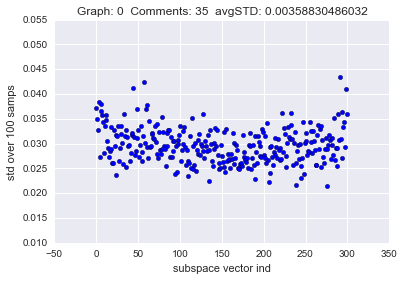

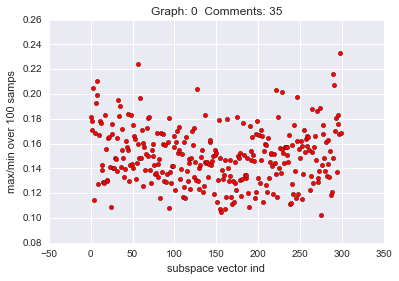

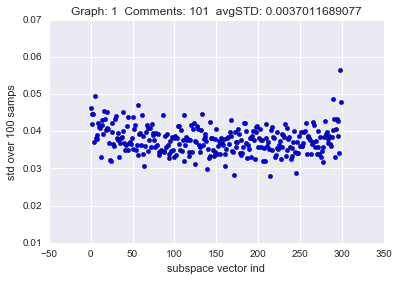

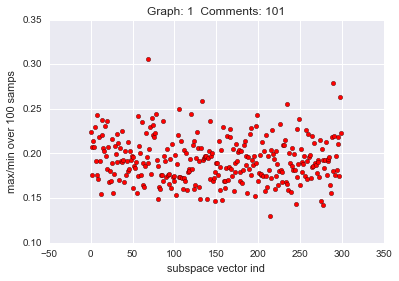

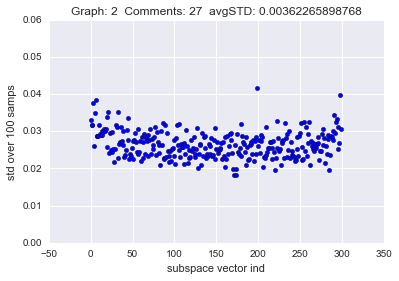

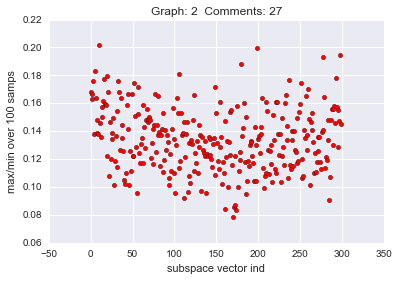

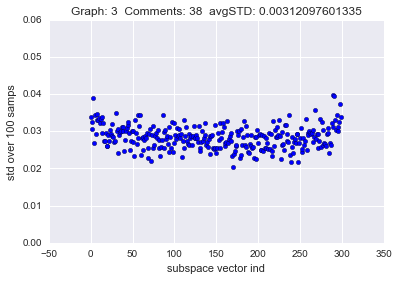

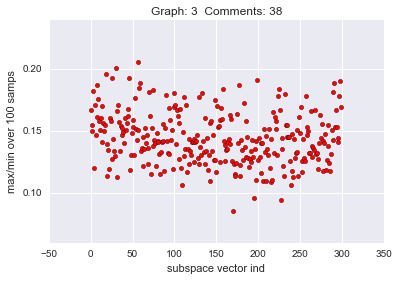

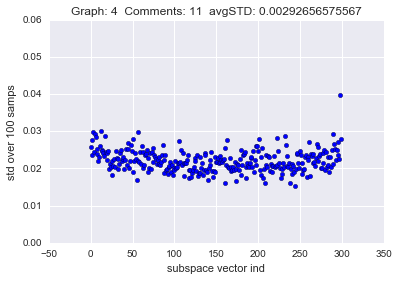

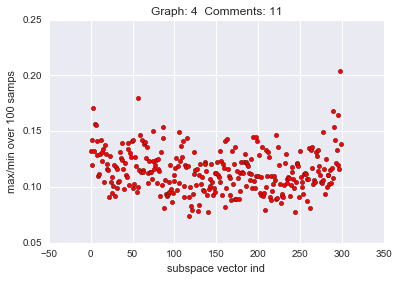

In [39]:
for ind in xrange(5):
    vectMat = np.zeros(shape=(100,300))
    randcomment = reddit.ix[np.random.randint(len(reddit.index)),'body']
    tokenizer = PunktSentenceTokenizer()
    tokcomment = mytokenizer(randcomment)

    for i in xrange(100):
        vectors = model.infer_vector(tokcomment)
        vectMat[i,:300] = vectors
        

    std = np.std(vectMat,axis=0,ddof=1)
    maxVals = np.max(vectMat,axis=0)
    minVals = np.min(vectMat,axis=0)
    rangeVals = maxVals - minVals
    
    plt.figure()
    plt.scatter(range(300),std)
    plt.xlabel('subspace vector ind')
    plt.ylabel('std over 100 samps')
    titlestr = "Graph: {}  Comments: {}  avgSTD: {}".format(ind,len(tokcomment),np.std(std))
    plt.title(titlestr)
    
    plt.figure()
#     plt.scatter(range(300),maxVals,c='b',label='max')
#     plt.scatter(range(300),minVals,c='r',label='min')
    plt.scatter(range(300),rangeVals,c='r')
#     plt.legend()
    plt.xlabel('subspace vector ind')
    plt.ylabel('max/min over 100 samps')
    titlestr = "Graph: {}  Comments: {}".format(ind,len(tokcomment))
    plt.title(titlestr)

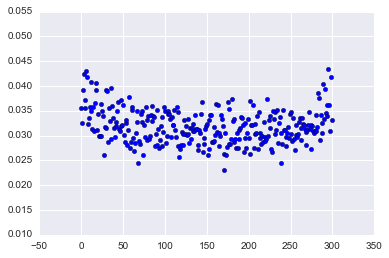

In [24]:
plt.scatter(range(300),std)

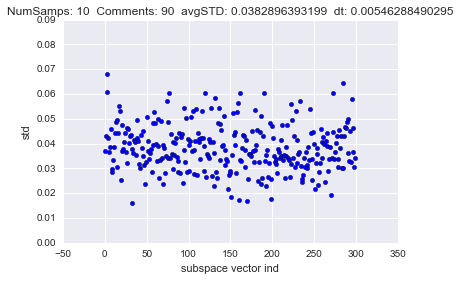

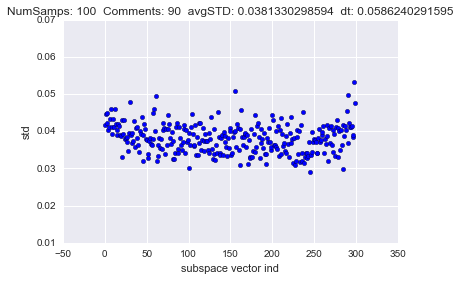

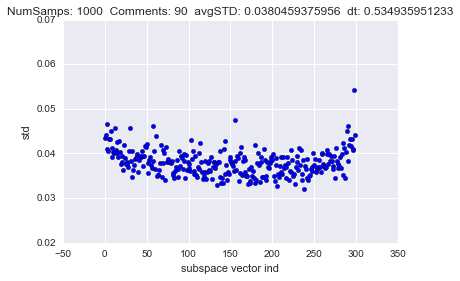

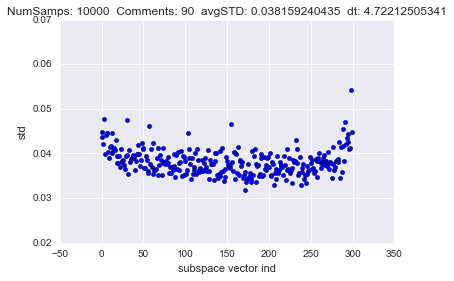

In [45]:
randcomment = reddit.ix[np.random.randint(len(reddit.index)),'body']
tokenizer = PunktSentenceTokenizer()
tokcomment = mytokenizer(randcomment)

for ind in [10,100,1000,10000]:
    tstart = time.time()
    vectMat = np.zeros(shape=(ind,300))
    for i in xrange(ind):
        vectors = model.infer_vector(tokcomment)
        vectMat[i,:300] = vectors
        

    std = np.std(vectMat,axis=0,ddof=1)
    tstop = time.time()
#     maxVals = np.max(vectMat,axis=0)
#     minVals = np.min(vectMat,axis=0)
#     rangeVals = maxVals - minVals
    
    plt.figure()
    plt.scatter(range(300),std)
    plt.xlabel('subspace vector ind')
    plt.ylabel('std')
    titlestr = "NumSamps: {}  Comments: {}  avgSTD: {}  dt: {}".format(ind,len(tokcomment),np.mean(std),tstop-tstart)
    plt.title(titlestr)

In [49]:
'DSLFLDSJFKDSLJF'.lower()

'dslfldsjfkdsljf'

In [50]:
model.infer_vector

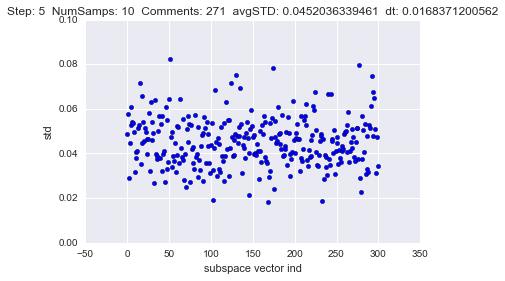

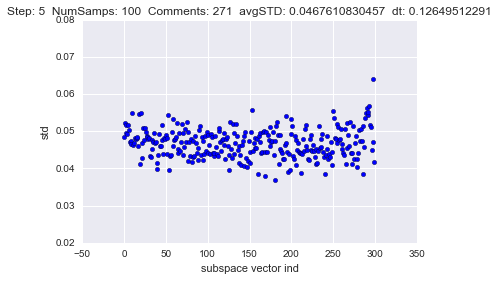

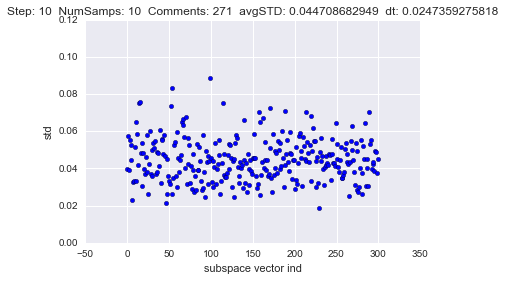

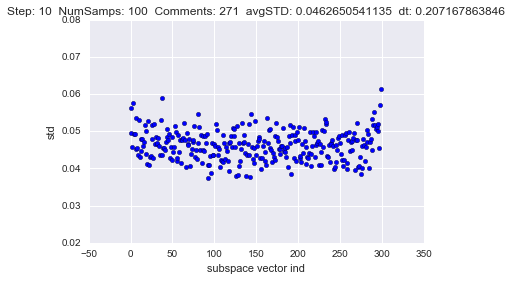

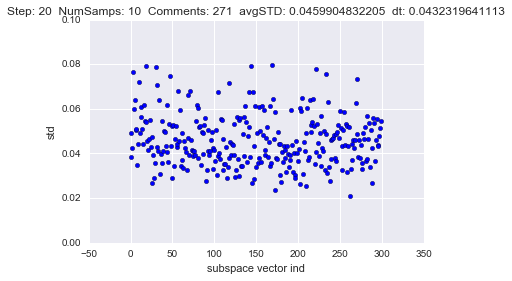

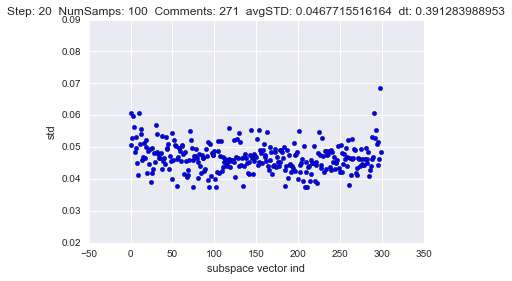

In [51]:
randcomment = reddit.ix[np.random.randint(len(reddit.index)),'body']
tokenizer = PunktSentenceTokenizer()
tokcomment = mytokenizer(randcomment)
for step in [5,10,20]:
    for ind in [10,100]:
        tstart = time.time()
        vectMat = np.zeros(shape=(ind,300))
        for i in xrange(ind):
            vectors = model.infer_vector(tokcomment,steps=step)
            vectMat[i,:300] = vectors


        std = np.std(vectMat,axis=0,ddof=1)
        tstop = time.time()
    #     maxVals = np.max(vectMat,axis=0)
    #     minVals = np.min(vectMat,axis=0)
    #     rangeVals = maxVals - minVals

        plt.figure()
        plt.scatter(range(300),std)
        plt.xlabel('subspace vector ind')
        plt.ylabel('std')
        titlestr = "Step: {}  NumSamps: {}  Comments: {}  avgSTD: {}  dt: {}".format(step,ind,len(tokcomment),np.mean(std),tstop-tstart)
        plt.title(titlestr)

In [52]:
len(range(1,26))

25